In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, RandomizedPCA
from sklearn.preprocessing import scale
from sklearn.manifold import Isomap, TSNE
from sklearn.cluster import KMeans
import seaborn as sns
from utilities import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# [cpu_qc] = load_qc(['./data/QC/17302_CPU.QC.txt'])
# plt.bar(range(len(cpu_qc)), sorted(cpu_qc.values()))

ID,Type,Number of Nodes,Soma Surface,Number of Stems,Number of Bifurcatons,Number of Branches,Number of Tips,Overall Width,Overall Height,Overall Depth,...,Total Length,Total Surface,Total Volume,Max Euclidean Distance,Max Path Distance,Max Branch Order,Average Contraction,Average Fragmentation,Average Parent-daughter Ratio,Hausdorff Dimension
001,CPU,4327,125664,1,0,1,1,3683.8,6665.0,2955.00,...,16964.5,106584.0,53289.8,7730.93,16964.5,1,0.427735,4325,0.01,1.06052
002,CPU,3359,125664,1,0,1,1,3846.8,7267.3,3121.00,...,16349.2,102974.0,52049.1,8373.12,16349.2,1,0.427759,3357,0.01,1.04403
003,CPU,4713,125664,1,0,1,1,3969.2,7824.5,2955.98,...,13268.5,78124.3,37436.5,9064.70,13268.5,1,0.683176,4711,0.01,1.00754
004,CPU,3702,125664,1,0,1,1,4560.0,6604.0,2811.03,...,14605.3,91117.4,45357.1,8259.29,14605.3,1,0.553767,3700,0.01,1.03672
005,CPU,4466,125664,1,0,1,1,4306.9,6016.3,3131.79,...,16526.2,103344.0,51512.7,7792.06,16526.2,1,0.427237,4464,0.01,1.05171


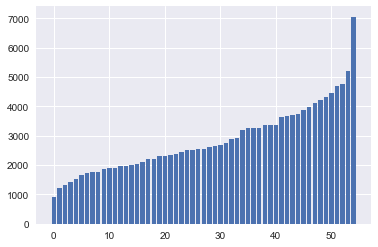

In [16]:
lpa = load_features_as_one(['data/features/17302_CPU.long_axon.features'])

_ = plt.bar(range(len(lpa)), sorted(lpa['Number of Nodes']))

lpa = lpa.drop(lpa[lpa['Number of Nodes']<1000].index, axis=0)
celltypes = lpa['Type']

lpa.head()

In [7]:
df = lpa.loc[:, ['Overall Width', 'Overall Height', 'Overall Depth', 'Max Euclidean Distance', "Max Path Distance"]]
df = pd.DataFrame(scale(df), columns=df.columns, index=df.index.tolist())


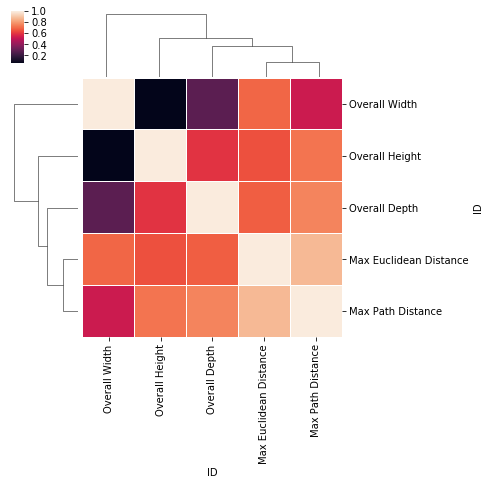

In [8]:
corr_feature = df.corr(method='spearman')
_ = sns.clustermap(corr_feature, linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=False, figsize=(6,6))


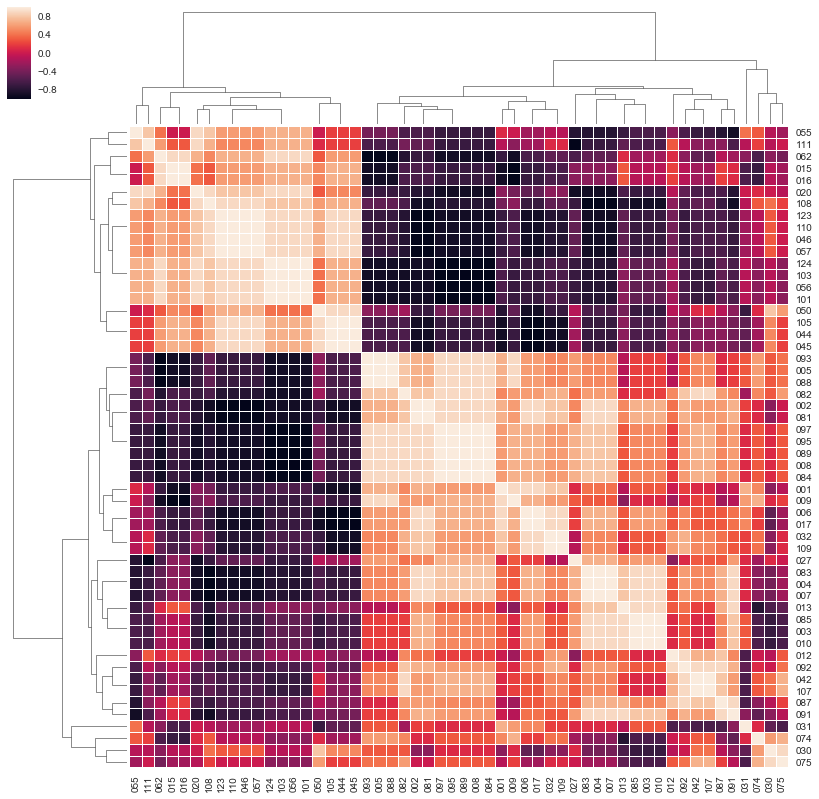

In [33]:
lut = dict(zip(celltypes.unique(), "rbg"))
row_colors = celltypes.map(lut)

corr_cell = df.transpose().corr(method='spearman')
g = sns.clustermap(corr_cell, linewidths=0.03, vmax=1.0, linecolor='white', 
#                    row_colors=row_colors, 
                   annot=False, figsize=(14,14))
g.savefig("Figure/CPU_17302_heatmap.lpa.pdf")

In [31]:
tp = g.data2d.columns.tolist()
f = open('data/mylinker.lpa.ano', 'w')
for i in range(len(tp)):
    f.write(("SWCFILE=processed_swc/CPU_"+tp[i]+".processed.long_axon.swc\n"))
f.close()

In [82]:
tp = sorted(g.data2d.columns.tolist()[:15])
f = open('data/mylinker.lpa.c1.ano', 'w')
for i in range(len(tp)):
    f.write(("SWCFILE=processed_swc/CPU_"+tp[i]+".processed.long_axon.swc\n"))
f.close()

tp = sorted(g.data2d.columns.tolist()[15:42])
f = open('data/mylinker.lpa.c2.ano', 'w')
for i in range(len(tp)):
    f.write(("SWCFILE=processed_swc/CPU_"+tp[i]+".processed.long_axon.swc\n"))
f.close()

Running Isomap...
Running tSNE...


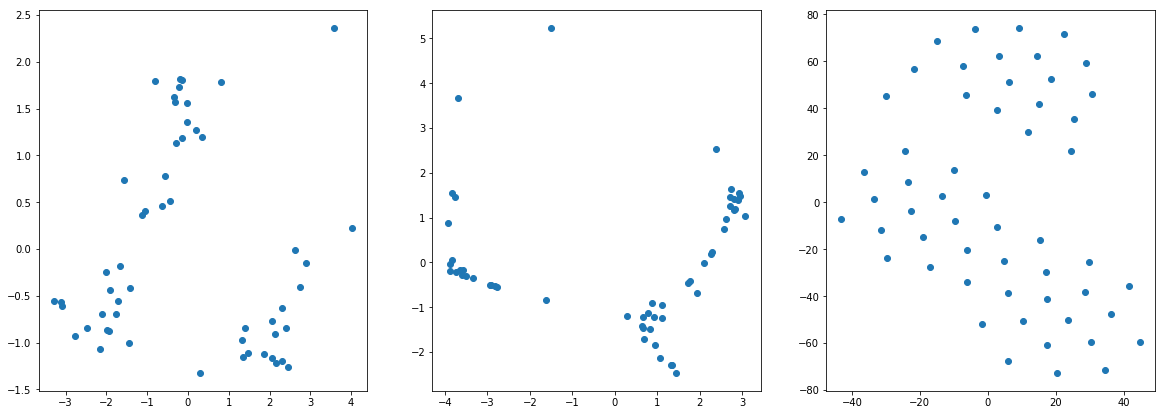

In [12]:
# Create a regular PCA model 
pca = PCA(n_components=2)
# pca = RandomizedPCA(n_components=2)

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(df)

tp = np.cumsum(pca.explained_variance_ratio_)
# plt.plot(range(0, len(tp)), tp)

fig, ax = plt.subplots(1,3, figsize=(20, 7))

# PCA
ax[0].scatter(reduced_data_pca[:, 0], reduced_data_pca[:, 1])

# Isomap
print('Running Isomap...')
isomap = Isomap(n_neighbors=10)
X_iso = isomap.fit_transform(reduced_data_pca)
ax[1].scatter(X_iso[:, 0], X_iso[:, 1])

# tSNE
print('Running tSNE...')
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(reduced_data_pca)
ax[2].scatter(X_tsne[:, 0], X_tsne[:, 1])

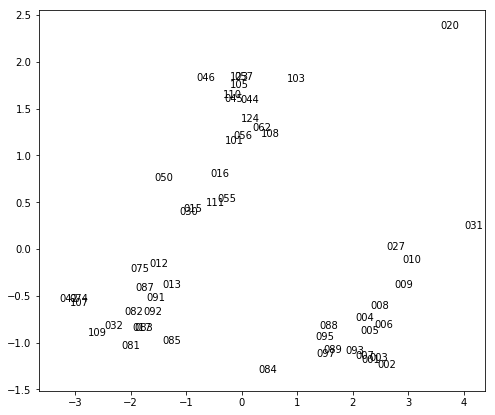

In [13]:
plt.figure(figsize=(8,7))
X_plot = reduced_data_pca
plt.scatter(X_plot[:, 0], X_plot[:, 1], c='w')
for i in range(len(df)):
    plt.text(X_plot[i,0], X_plot[i,1], df.index[i])